In [3]:
import pandas as pd

orders = pd.read_csv('orders.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('https://raw.githubusercontent.com/Rakshit10Verma/datamining141/main/products.csv')
aisles = pd.read_csv('https://raw.githubusercontent.com/Rakshit10Verma/datamining141/main/aisles.csv')
departments = pd.read_csv('https://raw.githubusercontent.com/Rakshit10Verma/datamining141/main/departments.csv')

# **Merging Data**

In [5]:
order_products = pd.merge(order_products__prior, products, on = 'product_id')
order_products = pd.merge(order_products, aisles, on = 'aisle_id')
order_products = pd.merge(order_products, departments, on = 'department_id')
order_products = pd.merge(order_products, orders, on = 'order_id')

order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
3,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0
4,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0


# **Handiling missing values**

In [6]:
#Checking and handling missing values:
order_products.isnull().sum()

#Assuming minimal missing values, we can drop them
order_products.dropna(inplace=True)

# **Exploratory Data analysis**

**Distribution of Orders by Aisle**

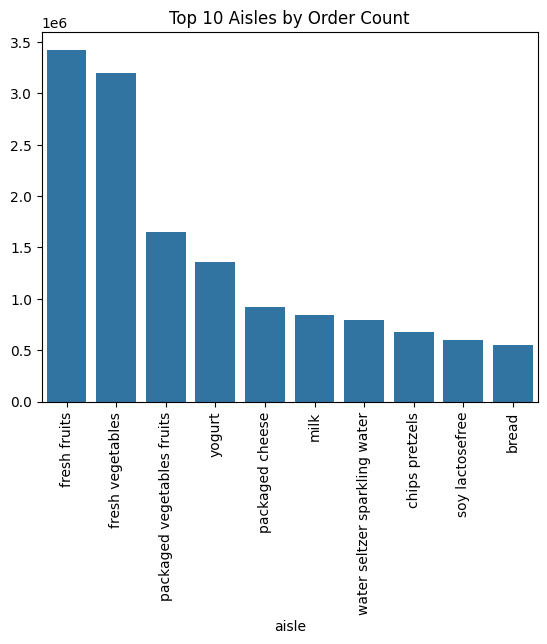

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

aisle_counts = order_products['aisle'].value_counts().head(10)
sns.barplot(x=aisle_counts.index, y=aisle_counts.values)
plt.xticks(rotation=90)
plt.title('Top 10 Aisles by Order Count')
plt.show()

In [ ]:
#First, converting data to numerical for correlation

order_products_encoded = pd.get_dummies(order_products, columns=['aisle','department','order_dow'])
correlation_matrix = order_products_encoded.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot = False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [2]:
sns.pairplot(order_products[['add_to_cart_order','reordered','order_hour_of_day']])
plt.show()

NameError: name 'sns' is not defined

#**Feature Engineering and Selection**

**Creating New Features:**

In [5]:
#Example Features: Number of Products per order
order_products['total_products'] = order_products.groupby('order_id')['product_id'].transform('count')

# Feature: Product Reorder ratio
product_reorders = order_products.groupby('product_id')['reordered'].mean().reset_index()
product_reorders.columns = ['product_id','reorder_ratio']

# Merging new features
order_products = pd.merge(order_products, product_reorders, on = 'product_id')

NameError: name 'order_products' is not defined

**Feature Selection:**

In [4]:
features = ['total_products', 'add_to_cart_order', 'order_dow', 'order_hour_of_day', 'reorder_ratio']

x = order_products[features]
y = order_products['reordered']

NameError: name 'order_products' is not defined

# **Model Building and Evaluation**

**Splitting Data**


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

NameError: name 'x' is not defined

**Model Selection and Training(Random Forest)**

In [2]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

NameError: name 'x_train' is not defined

**Performance Evaluation**

In [1]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, _ = roc_curve (y_test, model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr,tpr)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1 Score: {f1}')
print(f'AUC: {roc_auc}')

plt.plot(fpr, tpr, lable = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()


NameError: name 'model' is not defined

# **Additional Visualization and Statical Analysis**

In [ ]:
#1 Distribution of orders accross different days of the week

plt.figure(figsize=(12,6))
sns.countplot(data=orders, x='order_dow', palette='viridis')
plt.title('Distribution of orders accross different days of the week')
plt.xlable('Days of the week')
plt.ylable('Number of orders')
plt.show()

In [ ]:
# Distribution of orders by hour of the Day

plt.figure(figsize=(12,6))
sns.countplot(data=orders, x='order_hour_of_day', palette='inferno')
plt.title('Distribution of orders by hour of the Day')
plt.xlable('Hour of the Day')
plt.ylable('Number of orders')
plt.show()

In [ ]:
# Heatmap of orders by Days of the Week and Hours of the Day

plt.figure(figsize=(14,8))
sns.heatmap(pivot_data, cmap='coolwarm', annot = True)
plt.title('Heatmap of orders by Days of the Week and Hours of the Day')
plt.xlable('Hour of the Day')
plt.ylable('Day of the Week')
plt.show()

In [ ]:
# Histogram of days since prior order

plt.figure(figsize=(12,6))
sns.histplot(data=orders, x='days_since_prior_order', bins = 20, kde=True, color='Red')
plt.title('Distribution of days since prior order')
plt.xlable('Days since Prior order')
plt.ylable('Frequency')
plt.show()

# **Market Basket Analysis - Frequently Bought Together**

**Creating a Co-Occurrence Matrix**

In [ ]:
from itertools import combinations
from collections import defaultdict

#Creating basket for each order_id
basket = (order_products
          .groupby(['order_id','product_name'])['product_id']
          .count().unstock().reset_index().fillna(0)
          .set_index('order_id'))

# Calculate co-occurance matrix
co_occurrence_matrix = defaultdict(int)

for basket_order in basket.T:
  products = [product for product in basket.T[basket_order].dropna().index]
  for combo in combinations(products, 2):
    co_occurrence_matrix[combo] += 1

# Convertng to DataFrame
co_occurrence_df = pd.DataFrame(list(co_occurrence_matrix.items()), columns=['Product_Pair','Frequency'])
co_occurrence_df = co_occurrence_df.sort_values(by='Frequency', ascending=False).reset.reset_index(drop=True)
co_occurrence_df.head(10)

In [ ]:
top_pairs = co_occurrence_df.head(10)

plt.figure(figsize=(14,10))
sns.barplot(x='Frequency', y = top_pairs.Product_Pair.apply(lambda x: f'{x[0]}&{x[1]}'), data=top_pairs, palette='rainbow')
plt.title('Top 10 Products frequently bought together')
plt.xlable('Frequency')
plt.ylable('Product Pair')
plt.show()